In [1]:
#import librarries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [2]:
#import dataset using pandas
dataset = pd.read_csv('winequalityN.csv')

In [3]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
dataset.shape

(6497, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [6]:
#check for null values in dataset
dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
# View some statistical details of dataet
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


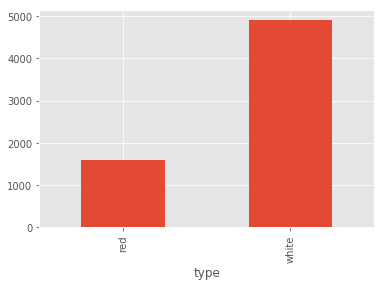

In [8]:
#visualization of categorical feature using bar plot
plt.style.use('ggplot')
dataset.groupby('type').size().plot.bar()

In [9]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  12


In [10]:
# visualise the numerical variables
dataset[numerical_features].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
# There are 2 type of numerical feature which are Continous variable and Discrete Variables

In [12]:
#find no of discrete feature
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<20]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


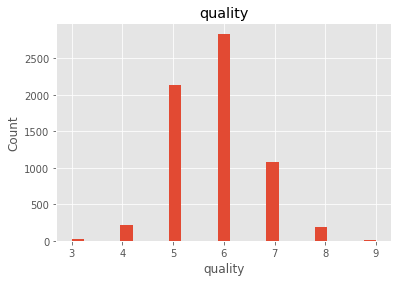

In [13]:
#analyze discrete feature using histogram to understand distribution
for feature in discrete_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [14]:
#find the number of continious feature
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 11


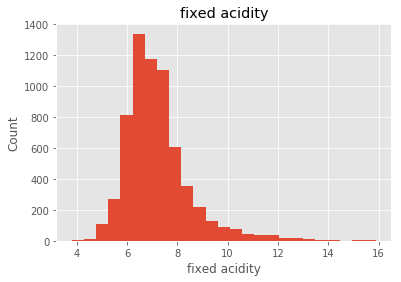

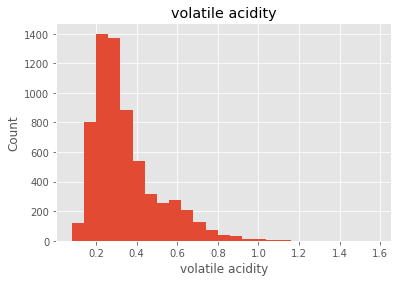

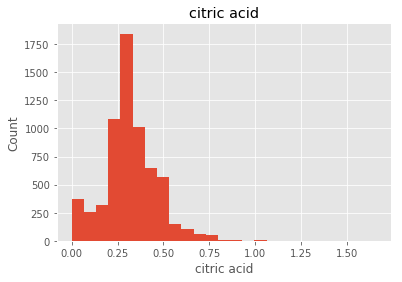

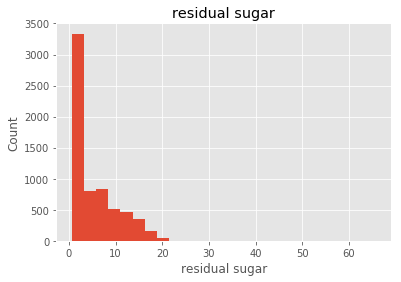

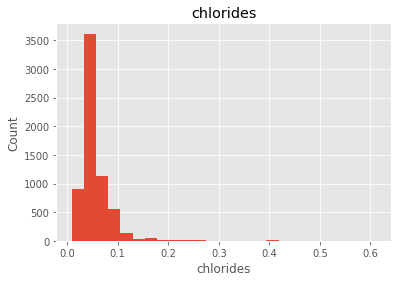

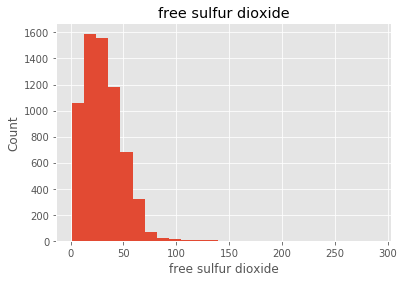

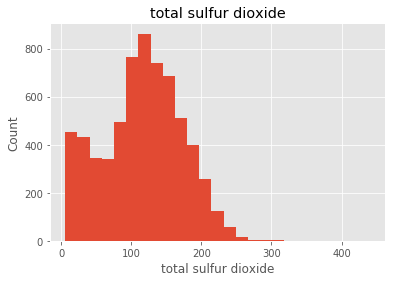

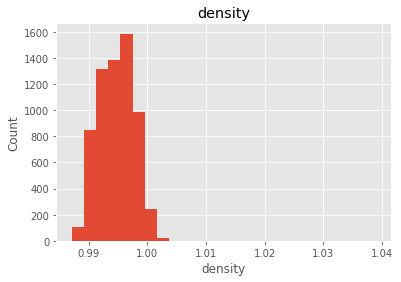

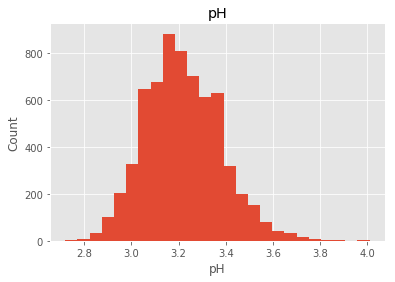

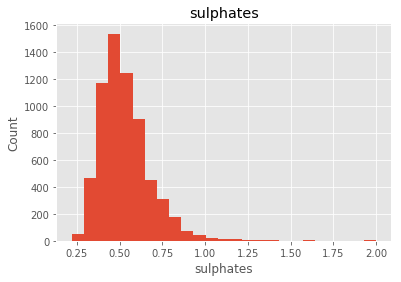

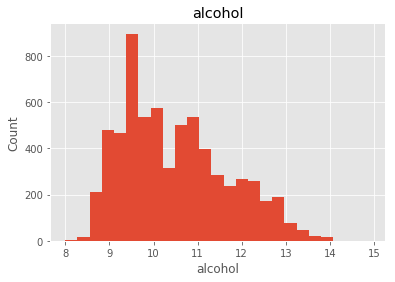

In [15]:
#analyze continious feature using histogram to understand distribution
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [16]:
#check for null values percentage in dataset
dataset.isnull().sum()/6497*100

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [17]:
## Replacing the  Missing Values by their median
dataset = dataset.groupby(dataset.columns, axis = 1).transform(lambda x: x.fillna(x.median()))

In [18]:
dataset.isnull().any()

type                    False
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [19]:
dataset.head(35)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [20]:
#make dummy feature of categorical feature type
dummy = pd.get_dummies(dataset['type'])
dataset1 = pd.concat([dummy,dataset],axis = 1)
dataset2=dataset1.drop(['type'],axis = 1)
dataset2.head()

,red,white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [21]:
#making 2 categories in dependent feature 
dataset2['goodquality'] = [1 if x > 5 else 0 for x in dataset2['quality']]
dataset2.head(20)

,red,white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,0,1,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,0,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,0,1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,0,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,0,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,0,1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
6,0,1,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
7,0,1,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
8,0,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
9,0,1,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1


In [22]:
X = dataset2.drop(['quality','goodquality'], axis = 1)
Y = dataset2['goodquality']

In [23]:
X.head()

,red,white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,0,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,0,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [24]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: goodquality, dtype: int64

In [26]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [27]:
X

array([[0.        , 1.        , 0.26446281, ..., 0.21705426, 0.12921348,
        0.11594203],
       [0.        , 1.        , 0.20661157, ..., 0.4496124 , 0.15168539,
        0.2173913 ],
       [0.        , 1.        , 0.3553719 , ..., 0.41860465, 0.12359551,
        0.30434783],
       ...,
       [1.        , 0.        , 0.20661157, ..., 0.54263566, 0.29775281,
        0.43478261],
       [1.        , 0.        , 0.17355372, ..., 0.65891473, 0.2752809 ,
        0.31884058],
       [1.        , 0.        , 0.18181818, ..., 0.51937984, 0.24719101,
        0.43478261]])

In [28]:
#split training set(70%) and test set(30%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [29]:
X_train.shape , X_test.shape

((4547, 13), (1950, 13))

In [30]:
#apply ML algorithm

In [31]:
#Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
#Fitting Random Forest classifier
classifier1 = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier1.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
#make prediction on test set
Y_pred = classifier1.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
#classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       735
           1       0.83      0.89      0.86      1215

   micro avg       0.82      0.82      0.82      1950
   macro avg       0.82      0.80      0.81      1950
weighted avg       0.82      0.82      0.82      1950



In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
#apply Kfold cross vallidation
accuracies = cross_val_score(estimator = classifier1, X = X, y = Y, cv = 10)
Accuracy_Random_Forest = accuracies.mean()*100
Accuracy_Random_Forest

73.5723455330891

In [38]:
#import support vector classifier
from sklearn.svm import SVC

In [39]:
# Fitting Kernel SVM 
classifier2 = SVC(kernel = 'rbf', random_state = 0, gamma = 'auto')
classifier2.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
# Predicting the Test set results
Y_pred = classifier2.predict(X_test)

In [41]:
#classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.44      0.55       735
           1       0.73      0.91      0.81      1215

   micro avg       0.73      0.73      0.73      1950
   macro avg       0.73      0.67      0.68      1950
weighted avg       0.73      0.73      0.71      1950



In [42]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X, y = Y, cv = 10)
Accuracy_SVM = accuracies.mean()*100
Accuracy_SVM

71.573123359236

In [43]:
#import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# Fitting KNN to the Training set
classifier3 = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier3.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [45]:
# Predicting the Test set results
Y_pred = classifier3.predict(X_test)

In [46]:
#classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       735
           1       0.80      0.80      0.80      1215

   micro avg       0.76      0.76      0.76      1950
   macro avg       0.74      0.74      0.74      1950
weighted avg       0.76      0.76      0.76      1950



In [47]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier3, X = X, y = Y, cv = 10)
Accuracy_KNN = accuracies.mean()*100
Accuracy_KNN

71.54190438684698

In [48]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

In [49]:
classifier4 = GaussianNB()
classifier4.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
# Predicting the Test set results
Y_pred = classifier4.predict(X_test)

In [51]:
#classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.60      0.47      0.52       735
           1       0.72      0.81      0.76      1215

   micro avg       0.68      0.68      0.68      1950
   macro avg       0.66      0.64      0.64      1950
weighted avg       0.67      0.68      0.67      1950



In [52]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier4, X = X_train, y = Y_train, cv = 10)
Accuracy_Naive_Bayes = (accuracies.mean()*100)
Accuracy_Naive_Bayes

67.38511519113672

In [53]:
Model_comp = []
Model_comp = pd.DataFrame(columns = Model_comp)
Model_comp.loc[0,'Randon Forest'] = Accuracy_Random_Forest
Model_comp.loc[0, 'SVM'] = Accuracy_SVM
Model_comp.loc[0, 'KNN'] = Accuracy_KNN
Model_comp.loc[0, 'Naive Bayes'] = Accuracy_Naive_Bayes    
Model_comp

,Randon Forest,SVM,KNN,Naive Bayes
0,73.572346,71.573123,71.541904,67.385115
